In [1]:
from glob import glob
import os
import pickle
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
directory_path = "../../data/preprocessed"
output_dir = "../../data/batch"
def iterate_files(action, n=1):
    files = sorted(glob(os.path.join(directory_path, "events-*.pkl")))
    files = files[:n]
    
    for filename in tqdm(files, ncols=100, desc="Processing"):
        file_path = os.path.join(directory_path, filename)
        file_name = os.path.splitext(filename)[0]
    
        df = pd.read_pickle(file_path)
        action(file_name, df)

In [28]:
event_dates = []
def get_event_date(file_name, df):
    # add tuples of (id, date) to event_dates
    event_dates.extend([(i, row['info']['eventDate']) for i, row in df.iterrows()])

In [41]:
iterate_files(get_event_date, 3000)

Processing: 100%|███████████████████████████████████████████████| 2944/2944 [01:50<00:00, 26.58it/s]


In [55]:
event_df = pd.DataFrame(event_dates, columns=['id', 'event_date'])
event_df.set_index('id', inplace=True)
# sort df by event_date (desc)
event_df['event_date'] = event_df['event_date'].astype(int)
event_df.sort_values(by='event_date', inplace=True, ascending=False)

In [57]:
def days_timestamp_to_date(days):
    # confirmed to be correct
    return pd.to_datetime(days, unit='D', origin=pd.Timestamp('1970-01-01')) 
# create a new column by applying days_timestamp_to_date to event_date
event_df['date'] = days_timestamp_to_date(event_df['event_date'])

In [60]:
event_df[event_df['event_date'] != 0].iloc[-100:]

,event_date,date
id,,
e_659738,2274,1976-03-24
e_382106,2224,1976-02-03
e_836438,2151,1975-11-22
e_421104,2149,1975-11-20
e_911428,1910,1975-03-26
...,...,...
e_1973176,-3321,1960-11-28
e_1398704,-3384,1960-09-26
e_1092281,-3547,1960-04-16


In [161]:
with open('../../data/preprocessed/event_index.pkl', 'rb') as f:
    event_index = pickle.load(f)

<Axes: ylabel='Frequency'>

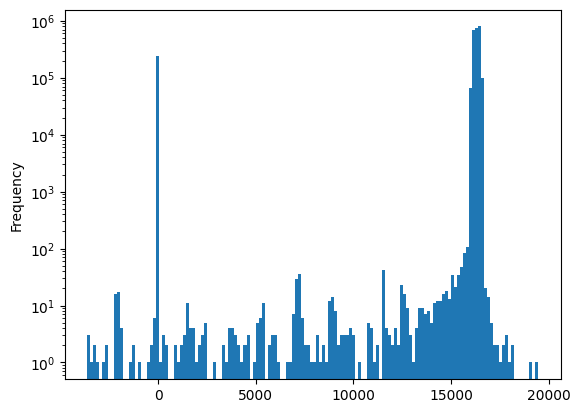

In [162]:
# plot the distribution of event_date on a log scale
event_df['event_date'].plot.hist(bins=150, log=True)

In [163]:
# 1.6.2014 in days
start = 16000
# 1.1.2016 in days
end = 17000
days_timestamp_to_date(start), days_timestamp_to_date(end)

(Timestamp('2013-10-22 00:00:00'), Timestamp('2016-07-18 00:00:00'))

In [164]:
events = event_df[(event_df['event_date'] >= start) & (event_df['event_date'] <= end)]
top_10 = events['event_date'].quantile(0.9)
recent_10 = events[events['event_date'] > top_10]
random_10 = events.sample(frac=0.1)

<Axes: ylabel='Frequency'>

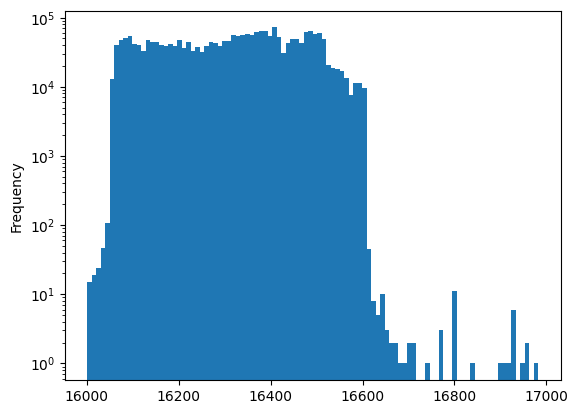

In [165]:
events['event_date'].plot.hist(bins=100, log=True)

<Axes: ylabel='Frequency'>

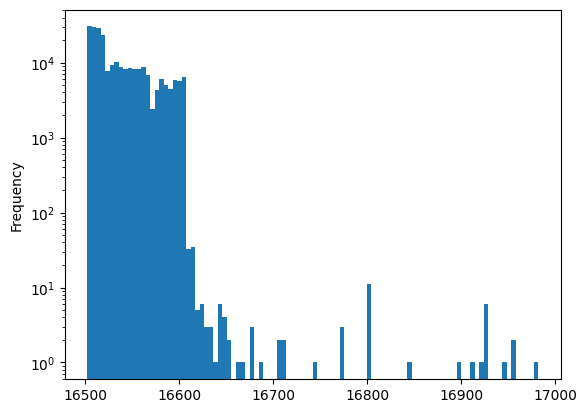

In [166]:
recent_10['event_date'].plot.hist(bins=100, log=True)

<Axes: ylabel='Frequency'>

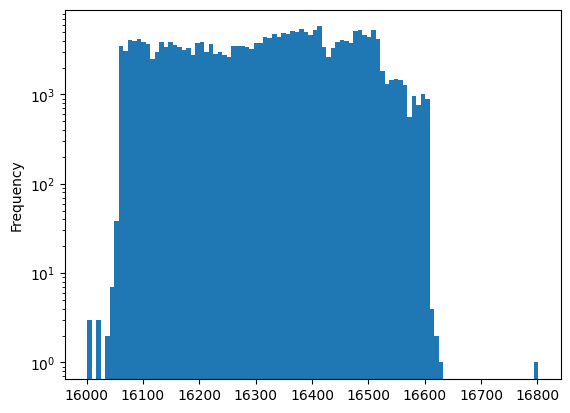

In [167]:
random_10['event_date'].plot.hist(bins=100, log=True)

In [169]:
def id_to_file_name(event_id):
    for file_name, event_ids in event_index.items():
        if event_id in event_ids:
            return file_name
    return None

In [170]:
random_10['file_name'] = random_10.index.map(id_to_file_name)
# groupby file_name and save to dict of file_name: set(event_ids)
random_10_grouped = random_10.groupby('file_name')
random_10_dict = {file_name: set(event_ids) for file_name, event_ids in random_10_grouped.groups.items()}

In [179]:
recent_10['file_name'] = recent_10.index.map(id_to_file_name)
# groupby file_name and save to dict of file_name: set(event_ids)
recent_10_grouped = recent_10.groupby('file_name')
recent_10_dict = {file_name: set(event_ids) for file_name, event_ids in recent_10_grouped.groups.items()}

/var/folders/t_/181rjdy93vg4rlj82l3c36_40000gn/T/ipykernel_26114/2943212143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_10['file_name'] = recent_10.index.map(id_to_file_name)


In [180]:
# save to pickle
with open(os.path.join(output_dir, 'B_recent_10.pkl'), 'wb') as f:
    pickle.dump(recent_10_dict, f)
# save to pickle
with open(os.path.join(output_dir, 'B_random_10.pkl'), 'wb') as f:
    pickle.dump(random_10_dict, f)

In [184]:
len(recent_10_dict.keys()), len(random_10_dict.keys())

(834, 2944)

In [185]:
recent_10_dict.keys()

dict_keys(['events-00023', 'events-00182', 'events-00268', 'events-00271', 'events-00295', 'events-00300', 'events-00307', 'events-00350', 'events-00358', 'events-00361', 'events-00369', 'events-00460', 'events-00462', 'events-00525', 'events-00544', 'events-00557', 'events-00562', 'events-00563', 'events-00600', 'events-00635', 'events-00654', 'events-00675', 'events-00679', 'events-00692', 'events-00726', 'events-00777', 'events-00892', 'events-00940', 'events-00951', 'events-00960', 'events-00966', 'events-00995', 'events-01027', 'events-01047', 'events-01055', 'events-01088', 'events-01165', 'events-01241', 'events-01244', 'events-01265', 'events-01266', 'events-01280', 'events-01294', 'events-01296', 'events-01314', 'events-01379', 'events-01387', 'events-01431', 'events-01469', 'events-01495', 'events-01497', 'events-01521', 'events-01526', 'events-01543', 'events-01570', 'events-01573', 'events-01589', 'events-01601', 'events-01605', 'events-01607', 'events-01614', 'events-01725